# **Identify Customer Segments For Online Retail With The Use Of K-Means Clustering**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **Data**

In [2]:
# load the data
data = pd.read_csv('Online_Retail.csv') 
data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
#information about data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#describe the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#count number of missing values in which columns
nan_counts = data.isnull().sum()
nan_counts

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# find unique values of a columns
print(data['StockCode'].unique())
print(data['InvoiceDate'].unique())
print(data['CustomerID'].unique())
print(data['Country'].unique())

['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50']
[17850. 13047. 12583. ... 13298. 14569. 12713.]
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [7]:
# find the no. of unique value count
print(data['StockCode'].value_counts())
print(data['InvoiceDate'].value_counts())
print(data['CustomerID'].value_counts())
print(data['Country'].value_counts())

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64
10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
                    ... 
9/28/2011 9:57         1
9/28/2011 9:45         1
3/16/2011 12:13        1
3/16/2011 12:22        1
3/16/2011 15:58        1
Name: InvoiceDate, Length: 23260, dtype: int64
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002


# Fill missing values

In [8]:
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Fill missing CustomerID values based on InvoiceDate
data['CustomerID'] = data.groupby('InvoiceDate')['CustomerID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -1))


# Fill missing Description with a placeholder

data['Description'] = data.groupby('InvoiceNo')['Description'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'No Description'))


data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [9]:
nan_counts = data.isnull().sum()
nan_counts

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
# drop duplicates
data = data.drop_duplicates()

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,11714.510477
std,219.130156,97.233118,6635.218066
min,-80995.000000,-11062.060000,-1.000000
25%,1.000000,1.250000,12471.000000
50%,3.000000,2.080000,14428.000000
75%,10.000000,4.130000,16326.000000
max,80995.000000,38970.000000,18287.000000


# **Using Behavioral Segmentation**
*Behavioral segmentation is used in marketing to divide customers into groups based on their behavior patterns as they interact with a company. Here are the key reasons why behavioral segmentation is particularly valuable*


**1. Improved Targeting and Personalization**

**2. Increased Customer Retention**

**3. Optimized Marketing Spend**

**4. Enhanced Product Development**

**5. Better Customer Experience**

**6. Competitive Advantage**

In [14]:

# Calculate TotalSpend
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

# Aggregate data to customer level
customer_data = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalSpend': 'sum',
    'InvoiceNo': 'nunique',  # Frequency
    'InvoiceDate': 'max'  # For Recency
}).reset_index()

# Calculate Frequency and Recency
customer_data.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
customer_data['Recency'] = (data['InvoiceDate'].max() - customer_data['InvoiceDate']).dt.days

# Drop unnecessary columns
customer_data = customer_data[['CustomerID', 'Quantity', 'TotalSpend', 'Frequency', 'Recency']]

# Inspect the resulting dataframe
customer_data




C:\Users\saura\AppData\Local\Temp\ipykernel_3044\1254668315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpend'] = data['Quantity'] * data['UnitPrice']


,CustomerID,Quantity,TotalSpend,Frequency,Recency
0,-1.0,251587,1342813.57,3294,0
1,12346.0,0,0.00,2,325
2,12347.0,2458,4310.00,7,1
3,12348.0,2341,1797.24,4,74
4,12349.0,631,1757.55,1,18
...,...,...,...,...,...
4368,18280.0,45,180.60,1,277
4369,18281.0,54,80.82,1,180
4370,18282.0,98,176.60,3,7
4371,18283.0,1357,2045.53,16,3


# **Handle Outliers**

In [15]:
def detect_outliers(data, columns):
    outliers = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers.extend(outlier_indices)
    return list(set(outliers))

# Identify outliers in relevant columns
outliers = detect_outliers(customer_data, ['Quantity', 'TotalSpend', 'Frequency', 'Recency'])

# Remove outliers from the dataset
customer_data_cleaned = customer_data.drop(outliers)

print(f"Original dataset size: {customer_data.shape[0]}")
print(f"Dataset size after removing outliers: {customer_data_cleaned.shape[0]}")


Original dataset size: 4373
Dataset size after removing outliers: 3663


In [16]:
customer_data_cleaned

,CustomerID,Quantity,TotalSpend,Frequency,Recency
1,12346.0,0,0.00,2,325
4,12349.0,631,1757.55,1,18
5,12350.0,197,334.40,1,309
6,12352.0,470,1545.41,11,35
7,12353.0,20,89.00,1,203
...,...,...,...,...,...
4367,18278.0,66,173.90,1,73
4368,18280.0,45,180.60,1,277
4369,18281.0,54,80.82,1,180
4370,18282.0,98,176.60,3,7


# **Normalize and Standardize the Data**
*- Standardize the data to ensure that each feature contributes equally to the distance calculations in K-Means.*

*- Use StandardScaler from sklearn.preprocessing to standardize the features.*

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_cleaned[['Quantity', 'TotalSpend', 'Frequency', 'Recency']])

# Convert the scaled features back to a DataFrame
scaled_customer_data = pd.DataFrame(scaled_features, columns=['Quantity', 'TotalSpend', 'Frequency', 'Recency'])


In [18]:
scaled_customer_data

,Quantity,TotalSpend,Frequency,Recency
0,-1.033639,-1.082133,-0.477305,2.586083
1,0.317000,1.233102,-0.860718,-0.798631
2,-0.611966,-0.641625,-0.860718,2.409681
3,-0.027616,0.953648,2.973419,-0.611204
4,-0.990830,-0.964893,-0.860718,1.241018
...,...,...,...,...
3658,-0.892368,-0.853053,-0.860718,-0.192249
3659,-0.937318,-0.844227,-0.860718,2.056877
3660,-0.918054,-0.975668,-0.860718,0.987440
3661,-0.823873,-0.849496,-0.093891,-0.919907


# **Applying K-means Clustering**
*K-means clustering is an unsupervised machine learning algorithm used to partition data into distinct groups or clusters. In the context of e-commerce data, K-means clustering can help identify different customer segments based on purchasing behavior.*

D:\ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


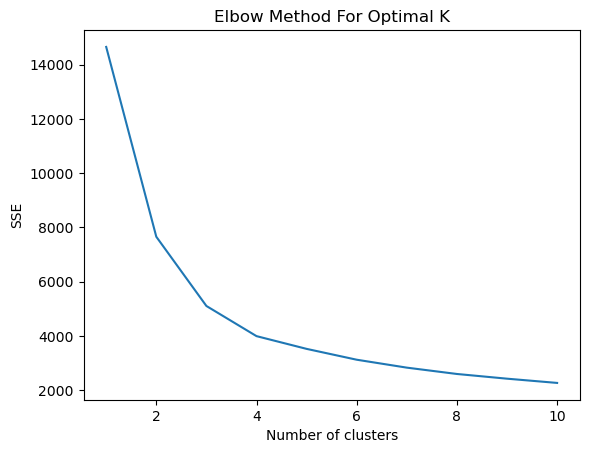

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_customer_data)
    sse.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

# Applying K-means clustering
optimal_k = 5  # Assuming the elbow is at 4 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data_cleaned['Cluster'] = kmeans.fit_predict(scaled_customer_data)


# **Visualize the clusters** 
*- Plot the clusters to visualize how the data points are grouped.*

*- Use scatter plots and color the points by their cluster labels.*

*- Optionally, visualize the centroids of each cluster.*

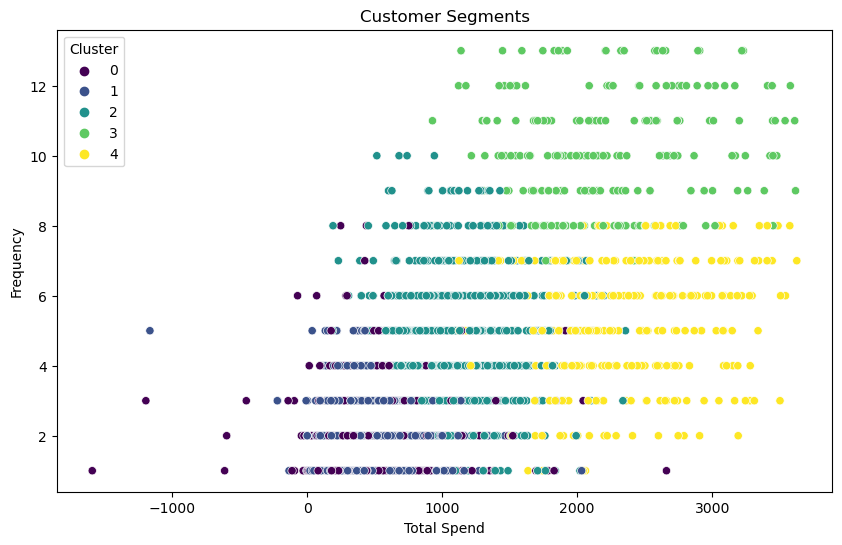

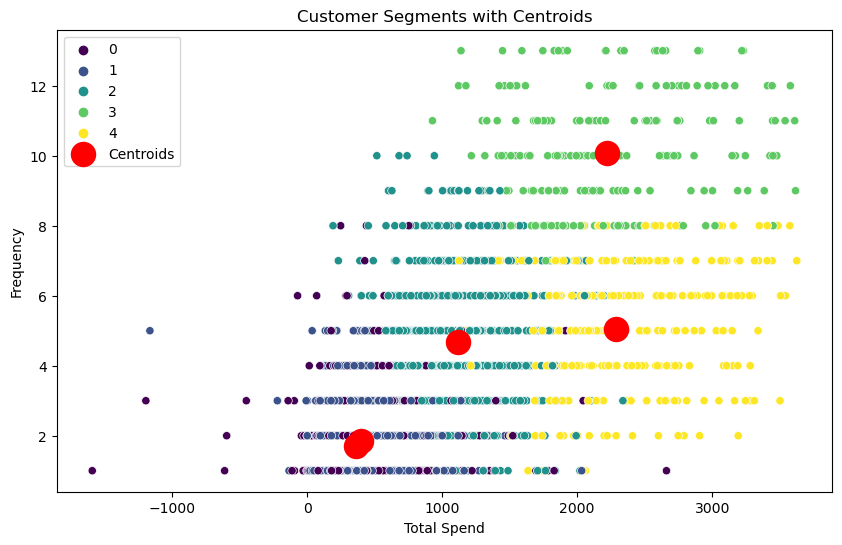

In [20]:
import seaborn as sns

# Visualizing the clusters using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data_cleaned['TotalSpend'], y=customer_data_cleaned['Frequency'], hue=customer_data_cleaned['Cluster'], palette='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Customer Segments')
plt.show()

# Optionally, visualize the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)  # Inverse tr ansform to get the original scale

plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data_cleaned['TotalSpend'], y=customer_data_cleaned['Frequency'], hue=customer_data_cleaned['Cluster'], palette='viridis')
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', label='Centroids')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Customer Segments with Centroids')
plt.legend()
plt.show()


# **Assign Cluster Labels to the Original Data**

*- Add the cluster labels as a new column to the original dataset.*

*- This will help in understanding the characteristics of each cluster.*

In [21]:
# Merge the cluster labels with the original dataset
original_data_with_clusters = data.merge(customer_data_cleaned[['CustomerID', 'Cluster']], on='CustomerID', how='left')

# Inspect the merged dataframe
original_data_with_clusters


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,NaN
...,...,...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2.0
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2.0
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2.0
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2.0


# **Analyze Each Segment**

*- Calculate summary statistics for each cluster to understand the characteristics of the customers in each segment.*

*- Mean, median, and standard deviation of features within each cluster.*

*- Compare the segments based on these statistics to identify distinctive features.*


In [22]:
# Calculate summary statistics for each cluster
cluster_summary = customer_data_cleaned.groupby('Cluster').agg({
    'Quantity': ['mean', 'median', 'std'],
    'TotalSpend': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'Recency': ['mean', 'median', 'std']
}).reset_index()

cluster_summary


Cluster     Quantity                       TotalSpend                        \
                  mean  median         std         mean    median         std   
0       0   195.222603   143.0  180.373579   360.854007   294.480  325.501445   
1       1   230.472397   203.0  154.589682   395.126962   355.700  243.167607   
2       2   655.257038   639.0  253.297953  1113.668165  1071.730  363.209893   
3       3  1226.008584  1183.0  420.572086  2219.695579  2151.080  606.101341   
4       4  1460.928105  1417.5  334.607842  2289.101441  2208.625  601.585233   

   Frequency                      Recency                    
        mean median       std        mean median        std  
0   1.719178    1.0  1.096966  231.724886  233.0  53.789353  
1   1.857442    2.0  0.966183   49.681342   44.0  36.037807  
2   4.678091    4.0  1.794715   44.931457   28.0  44.103935  
3  10.081545   10.0  1.612787   26.648069   12.0  37.895338  
4   5.068627    5.0  1.734471   46.630719   31.0  49.079971

# **Profile the Customer Segments**

*- Create profiles for each customer segment based on the analysis.*

*- Describe the typical customer in each segment (e.g., demographics, purchasing behavior).*

*- Use visualization techniques (e.g., bar charts, box plots) to illustrate the differences between segments.*

Cluster 0 Profile:
Mean Quantity: 195.22260273972603
Mean Total Spend: 360.85400684931517
Mean Frequency: 1.7191780821917808
Mean Recency: 231.72488584474885
-----
Cluster 2 Profile:
Mean Quantity: 655.2570379436964
Mean Total Spend: 1113.668165238678
Mean Frequency: 4.678090575275398
Mean Recency: 44.93145654834761
-----
Cluster 3 Profile:
Mean Quantity: 1226.008583690987
Mean Total Spend: 2219.695579399142
Mean Frequency: 10.081545064377682
Mean Recency: 26.6480686695279
-----
Cluster 4 Profile:
Mean Quantity: 1460.9281045751634
Mean Total Spend: 2289.10144117647
Mean Frequency: 5.068627450980392
Mean Recency: 46.630718954248366
-----
Cluster 1 Profile:
Mean Quantity: 230.47239692522712
Mean Total Spend: 395.1269615653388
Mean Frequency: 1.8574423480083857
Mean Recency: 49.681341719077565
-----


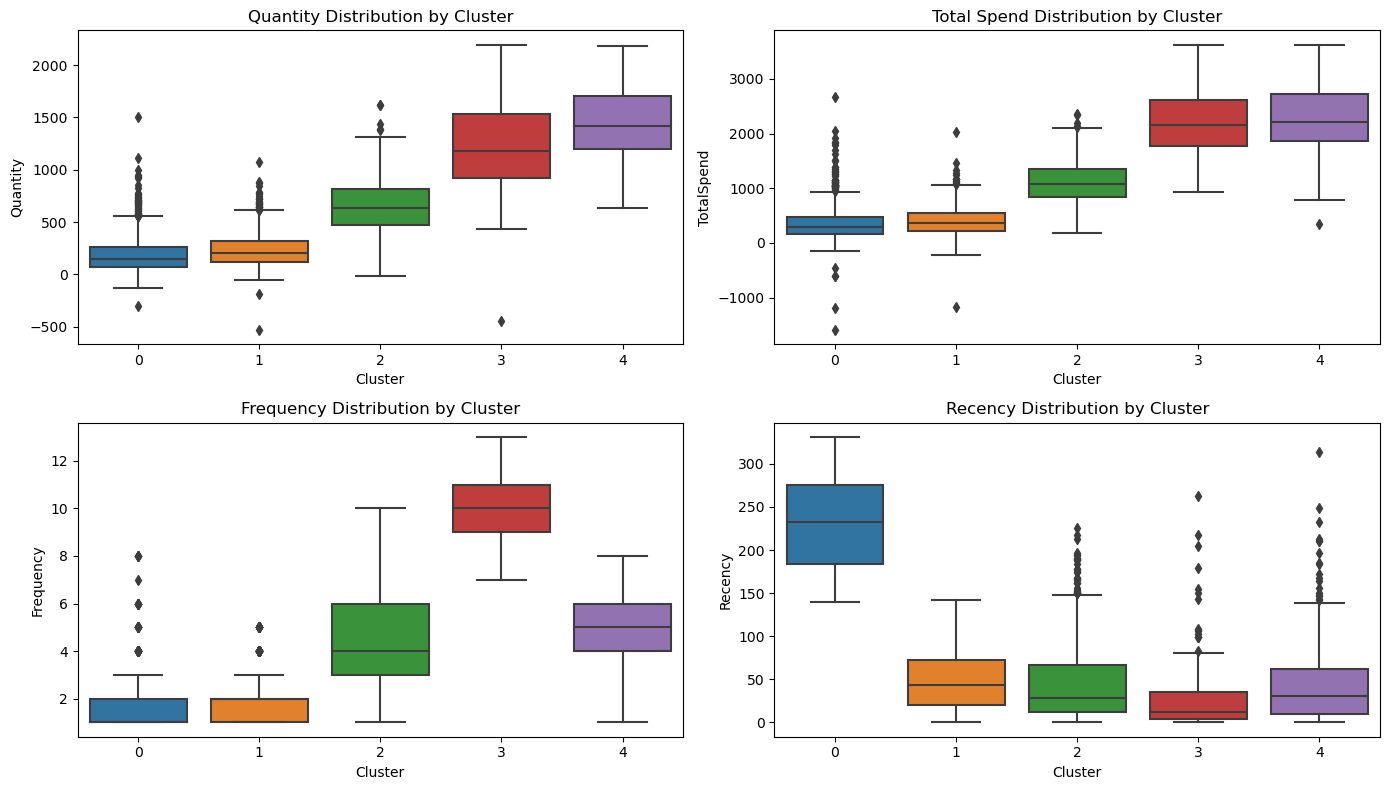

In [23]:
# Profile each customer segment
for cluster in customer_data_cleaned['Cluster'].unique():
    cluster_data = customer_data_cleaned[customer_data_cleaned['Cluster'] == cluster]
    print(f"Cluster {cluster} Profile:")
    print(f"Mean Quantity: {cluster_data['Quantity'].mean()}")
    print(f"Mean Total Spend: {cluster_data['TotalSpend'].mean()}")
    print(f"Mean Frequency: {cluster_data['Frequency'].mean()}")
    print(f"Mean Recency: {cluster_data['Recency'].mean()}")
    print("-----")

# Visualization using box plots
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Quantity', data=customer_data_cleaned)
plt.title('Quantity Distribution by Cluster')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='TotalSpend', data=customer_data_cleaned)
plt.title('Total Spend Distribution by Cluster')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Frequency', data=customer_data_cleaned)
plt.title('Frequency Distribution by Cluster')

plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='Recency', data=customer_data_cleaned)
plt.title('Recency Distribution by Cluster')

plt.tight_layout()
plt.show()
